In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split

/home/nitish/anaconda3/envs/llsourcell/lib/python3.5/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [22]:
df_all = pd.read_csv("https://d396qusza40orc.cloudfront.net/predmachlearn/pml-training.csv")

/home/nitish/anaconda3/envs/llsourcell/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (11,14,19,22,25,70,73,86,87,89,90,94,97,100) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
num_rows = df_all.shape[0]
num_cols = df_all.shape[1]
print(num_rows)
print(num_cols)
# df_all.head()

19622
160


In [24]:
# REMOVING NANS (Nice trick)
counter_nan = df_all.isnull().sum() # column wise count of nans
counter_without_nan = counter_nan[counter_nan==0] # dict of columns
df_all = df_all[counter_without_nan.keys()] # those columns only
# df_all.head()

In [29]:
df = df_all.ix[:, 7:] # ix is like treating it like a np array but it keeps its structure etc
columns = df.columns
print(columns)

Index(['roll_belt', 'pitch_belt', 'yaw_belt', 'total_accel_belt',
       'gyros_belt_x', 'gyros_belt_y', 'gyros_belt_z', 'accel_belt_x',
       'accel_belt_y', 'accel_belt_z', 'magnet_belt_x', 'magnet_belt_y',
       'magnet_belt_z', 'roll_arm', 'pitch_arm', 'yaw_arm', 'total_accel_arm',
       'gyros_arm_x', 'gyros_arm_y', 'gyros_arm_z', 'accel_arm_x',
       'accel_arm_y', 'accel_arm_z', 'magnet_arm_x', 'magnet_arm_y',
       'magnet_arm_z', 'roll_dumbbell', 'pitch_dumbbell', 'yaw_dumbbell',
       'total_accel_dumbbell', 'gyros_dumbbell_x', 'gyros_dumbbell_y',
       'gyros_dumbbell_z', 'accel_dumbbell_x', 'accel_dumbbell_y',
       'accel_dumbbell_z', 'magnet_dumbbell_x', 'magnet_dumbbell_y',
       'magnet_dumbbell_z', 'roll_forearm', 'pitch_forearm', 'yaw_forearm',
       'total_accel_forearm', 'gyros_forearm_x', 'gyros_forearm_y',
       'gyros_forearm_z', 'accel_forearm_x', 'accel_forearm_y',
       'accel_forearm_z', 'magnet_forearm_x', 'magnet_forearm_y',
       'magnet_forea

In [30]:
x = df.ix[:, :-1].values  # last column in class
standard_scaler = StandardScaler()
x_std = standard_scaler.fit_transform(x)

In [33]:
y =df.ix[:, -1].values
class_labels = np.unique(y)
print(class_labels)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(y)

['A' 'B' 'C' 'D' 'E']
[0 0 0 ..., 4 4 4]


In [35]:
test_percentage = 0.1
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=test_percentage, random_state=0)

In [36]:
from sklearn.manifold import TSNE

In [37]:
tsne = TSNE(n_components=2, random_state=0)
x_test_2d = tsne.fit_transform(x_test)

In [40]:
markers = ('s', 'd','o', '^', 'v')
color_map= {0:'red', 1:'blue', 2:'lightgreen', 3:'purple', 4:'cyan'}

<IPython.core.display.Javascript object>


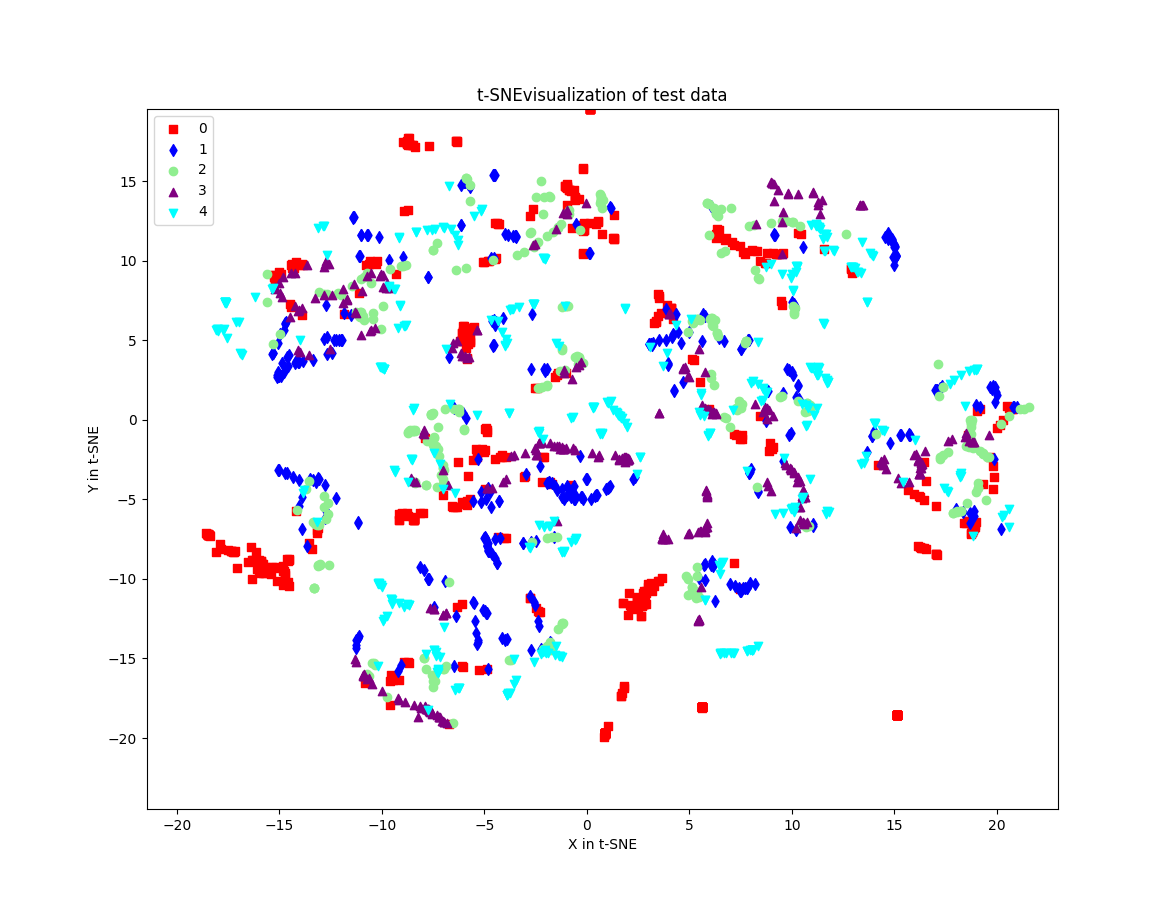

In [41]:
plt.figure()
for idx, cl in enumerate(np.unique(y_test)):
    plt.scatter(x=x_test_2d[y_test==cl,0], y=x_test_2d[y_test==cl,1], c=color_map[idx], marker=markers[idx], label=cl)
plt.xlabel("X in t-SNE")
plt.ylabel("Y in t-SNE")
plt.legend(loc='upper left')
plt.title('t-SNEvisualization of test data')
plt.show()